1/1 [==============================] - 0s 160ms/step


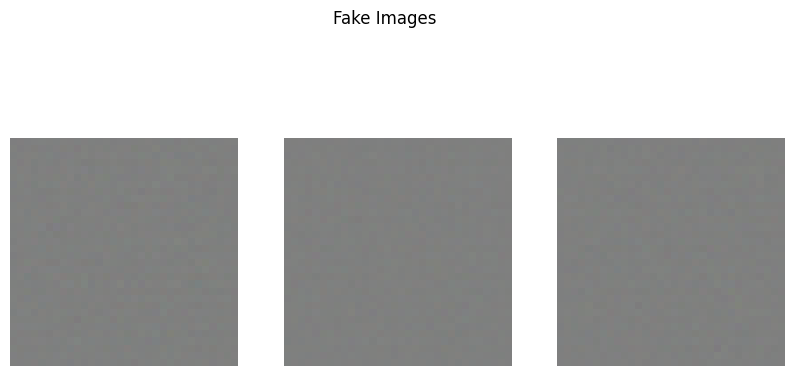

Epoch 1/100
2/2 [==============================] - 1s 286ms/step
Discriminator Loss: 0.9097946584224701, Generator Loss: 0.47956591844558716
Epoch 2/100
2/2 [==============================] - 1s 287ms/step
Discriminator Loss: 0.8651728332042694, Generator Loss: 0.36772119998931885
Epoch 3/100
2/2 [==============================] - 1s 433ms/step
Discriminator Loss: 0.915240466594696, Generator Loss: 0.3212931752204895
Epoch 4/100
2/2 [==============================] - 0s 147ms/step
Discriminator Loss: 0.969926580786705, Generator Loss: 0.31599366664886475
Epoch 5/100
2/2 [==============================] - 0s 157ms/step
Discriminator Loss: 0.9963695034384727, Generator Loss: 0.3122842311859131
Epoch 6/100
2/2 [==============================] - 1s 253ms/step
Discriminator Loss: 0.9691615551710129, Generator Loss: 0.32128751277923584
Epoch 7/100
2/2 [==============================] - 0s 147ms/step
Discriminator Loss: 0.9637663438916206, Generator Loss: 0.3413490056991577
Epoch 8/100
2/2 [=

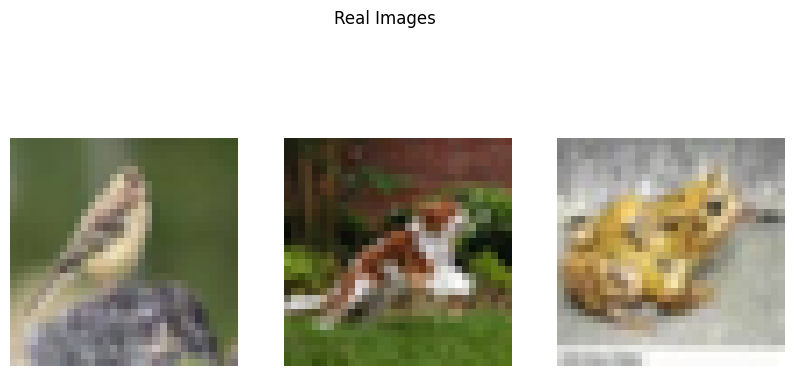

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Function to display images
def show_images(images, title):
    fig, axes = plt.subplots(1, len(images), figsize=(10, 5))
    for ax, img in zip(axes, images):
        ax.imshow(img)
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

# Function to build the generator model
def build_generator(latent_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(8 * 8 * 128, input_dim=latent_dim),
        tf.keras.layers.Reshape((8, 8, 128)),
        tf.keras.layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', activation='relu'),
        tf.keras.layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', activation='relu'),
        tf.keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')
    ])
    return model

# Function to build the discriminator model
def build_discriminator(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=input_shape),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Download CIFAR-10 dataset
(x_train, _), (_, _) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0

# Define parameters
latent_dim = 100
input_shape = (32, 32, 3)
batch_size = 64
epochs = 100

# Build and compile the generator
generator = build_generator(latent_dim)
generator.compile(loss='binary_crossentropy', optimizer='adam')

# Build and compile the discriminator
discriminator = build_discriminator(input_shape)
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Combined model (GAN)
gan_input = tf.keras.Input(shape=(latent_dim,))
fake_image = generator(gan_input)
gan_output = discriminator(fake_image)
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')

# Display fake images
num_fake_images = 3
noise = np.random.normal(0, 1, (num_fake_images, latent_dim))
fake_images = generator.predict(noise)
show_images(fake_images, title="Fake Images")

# Training loop
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")

    # Train discriminator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_images = generator.predict(noise)
    real_images = x_train[np.random.randint(0, x_train.shape[0], batch_size)]
    discriminator_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
    discriminator_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))
    discriminator_loss = 0.5 * np.add(discriminator_loss_real, discriminator_loss_fake)

    # Train generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    generator_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Print losses
    print(f"Discriminator Loss: {discriminator_loss[0]}, Generator Loss: {generator_loss}")

# Display real images
num_real_images = 3
real_images = x_train[np.random.randint(0, x_train.shape[0], num_real_images)]
show_images(real_images, title="Real Images")
